In [1]:
import pandas as pd
import numpy as np
import scipy.io
import networkx as nx
# from xarray import xarray.backends.api
import plot_linear_distance as pld
import loren_frank_data_processing as lfdp
import linPosPipeline as lpp
import matlab.engine
import matplotlib.pyplot as plt

In [2]:
def load_data(coordinate_file_path, position_structure):
    #Inputs: coordinate_file_path is pixel coordinates of junctions to create track graph
    #position_stucture is the matlab FF position structure
    #Outputs: tree_task is coordinates of track junctions
    # position is the x1,y1,x2,y2 of LEDs
    # posLabel describes rows position
    # midPoint is the midPoint of (x1, y1) and (x2,y2) of position
    tree_task = scipy.io.loadmat(coordinate_file_path)
    eng = matlab.engine.start_matlab()
    #add filepath to this directory
    eng.addpath(r':/home/csmyth/Src/TreeTrack-master/linPos_for_Jason',nargout=0)
    position, posLabel, midPoint_Position = eng.retrievePositionPy2(position_structure, nargout = 3)
    eng.quit()
    return tree_task, np.asarray(position), posLabel, np.asarray(midPoint_Position)

In [3]:
tree_task, position, posLabel, midPoint = load_data('ttHaight.mat', 'data.mat')

In [4]:
track_graph, track_segments, center_well_id = lpp.createTrackGraph(tree_task)

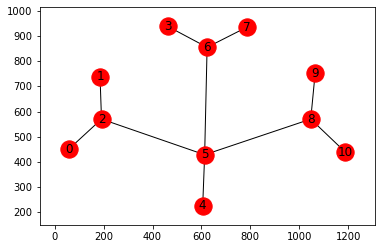

In [5]:
# Sanity check that graph is correct
lfdp.track_segment_classification.plot_track(track_graph)
plt.show()

In [6]:
def bin_position_tree_task_haight(position, track_graph, track_segments, center_well_id):    
    track_segment_id = lfdp.track_segment_classification.classify_track_segments(
        track_graph, position,
        sensor_std_dev=10, route_euclidean_distance_scaling=1)
    linear_distance = lfdp.track_segment_classification.calculate_linear_distance(
            track_graph, track_segment_id, center_well_id, position)
    linear_distance_cm = linear_distance / 4.37
    track_smooth = pld.smooth_track_segs(track_segment_id)
    linear_bin = pld.bin_position(linear_distance_cm, track_smooth)
    return linear_distance, linear_distance_cm, linear_bin

In [7]:
linear_distance, linear_distance_cm, linear_bin = bin_position_tree_task_haight(midPoint, track_graph, track_segments, center_well_id)

max1 is  49.99999999999999
max2 is  150.0
max3 is  250.0
max4 is  350.0
max5 is  390.0
max6 is  430.0
max7 is  470.0
max8 is  510.0
max9 is  550.0
max10 is  590.0


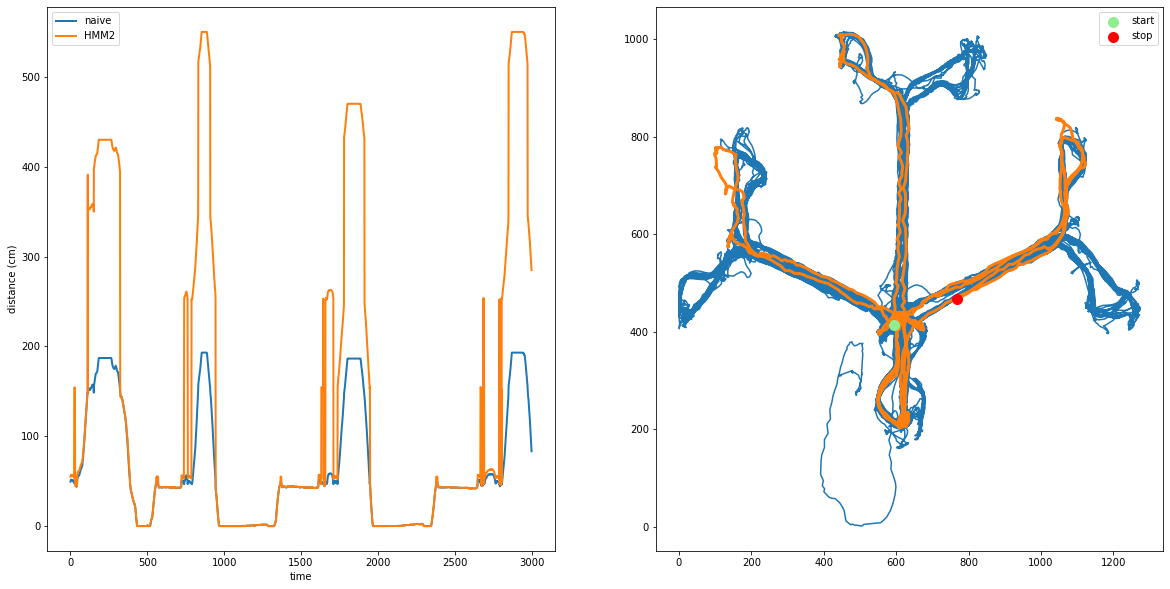

In [9]:
pld.plot_linear_distance(linear_distance_cm, linear_bin, midPoint, (3800,6800))